# Binary Classification


# Assignment


**Background:** Imagine that you are an admissions officer for a highly
sought-after graduate program. As part of a new initiative to streamline
the admissions process, a function -- whose precise specifications are
known only to the administration -- has been developed to evaluate each
application with respect to some criteria. A composite metric known as
'fit' is computed for each individual candidate; those scoring *greater
than or equal to 70* are extended an admissions offer.

**Objective:** In the absence of a clear-cut function with which to
assign 'fit' scores, learn a classification rule by assembling and
training classification models on historical admissions data. Thus the
target here is to predict the "chance of admit > .7" from the other columns.

------------------------------------------------------------------------

Note: For reproducible results, include `random_state=42` as a parameter
to Sklearn functions.

1.  -   Examine the structure and format of the data. 
            - Is it suitable for logistic regression? 
            - How do the features relate to one another?
            - If necessary, encode the target variable based 
              on the threshold of 70% in other words chance of admit .7

    -   Apply PCA to the input dimensions (excluding the target) and 
        select the first two principal components that *account for 80% 
        of the variance. 
        - Scatter plot the data in the first two PCA dimensions. Color the dots
          so we can see chance of admit.
        - We should only performing dimensionality reduction merely for the sake of
          visualization -- in this instance. Below we will note the adverse effect it would
          have on the model's overall performance if we used only the first two PCA components
          in the classification.

    -   Split the data into a training and testing set. The testing set
        should be one fifth the size of the training set.


1. You will run and evaluate the following classification models on the data

    **(1)** *logistic regression*
    
    **(2)** *linear support vector classification*
    
    **(3)** *k-nearest neighbors classification*
    
    **(4)** *decision tree classification*

    -   Train and test your classifiers using the previously reduced
        data. For each model, plot the classification probability.

    -   Manually tune your models' hyperparameters so that each achieves
        a *Cohen's kappa statistic* greater than 0.65. Note that this function
        can be fount in
        
            sklearn.metrics.cohen_kappa_score
        
        here you will compare the test 'y' ground truth labels to the model
        predictions.

        -   For logistic regression and support vector classification,
            adjust the inverse regularization parameter `C` and observe
            how the probability threshold reacts. Considering the ratio
            between accepted and rejected applicants, adjust the
            `class_weight` parameter accordingly. Use a range of values plot
            the score. 

        -   For k-nearest neighbors classification, consider adjusting
            the `n_neighbors` parameter. Generally, the empirically
            optimal K is found using an optimization heuristic -- in
            this case, adjust the parameter manually and observe any
            changes.

    -   Compute the *accuracy* score for each classifier. Why might this
        be a misleading performance metric?

    -   Shuffle your data set. If at all, how does this affect your
        results? Try a different train, test split (different random seed). How much
        does this matter?
        
    -   Do decision trees differ between runs? Try three or for different runs with different randomizations and
        see how results differ. See both how accuracy differs and the trees differ. For
        interpretability, use the PyDotPlus package to visualize your decision trees.


In [33]:
import pandas as pd

In [101]:
df = pd.read_csv("Admission_Predict.csv")

In [102]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Fit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [103]:
df.loc[df['Fit'] >= 0.7] = 1
df.loc[df['Fit'] < 0.7] = 0

In [104]:
X = df[df.columns.difference(['Fit', 'Serial No.'])]
y = df['Fit']

In [47]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=2, random_state=42)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
print(pca.explained_variance_ratio_)

[0.93475206 0.05385856]


In [62]:
print(pca.singular_values_)  

[253.43830778  60.83470429]


In [68]:
principalComponents = pca.transform(X)
principalDf = pd.DataFrame(data=principalComponents, columns = ['principal component 1', 'principal component 2'])

In [95]:
import matplotlib.pyplot as plt
import seaborn

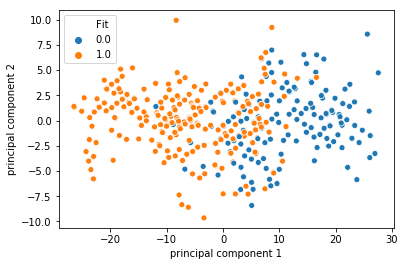

In [105]:
seaborn.scatterplot(x='principal component 1', y='principal component 2', data=principalDf, hue=y)

In [106]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, traintrain_test_split